# Solutions to Lesson 3 Exercises

For each exercise, the solutions below show one possible way of solving it, but you might have used a different approach, and that's great! There is almost always more than one way to solve any particular problem in Python.

## Initial Setup

Since this notebook is in the `solutions` sub-folder, use the  magic command `%cd` to go up one folder to the main project folder to keep the file paths the same as in the lessons:

In [1]:
%cd ..

C:\Users\jenfl\Projects\eoas-python


Import libraries, display plots inline, initialize variables from lesson:

In [2]:
import pandas
%matplotlib inline

In [3]:
world = pandas.read_csv('data/gapminder_world_data_2018.csv')

# Exercise 3

Returning to our DataFrame `world` containing the data from `data/gapminder_world_data_2018.csv`:

**a)** Find the highest life expectancy by using the `max` method on the `'life_expectancy'` column and store the result in a variable `longest_life`.

In [4]:
longest_life = world['life_expectancy'].max()
longest_life

84.2

**b)** Plot the `'life_expectancy'` column as a histogram with 20 bins.

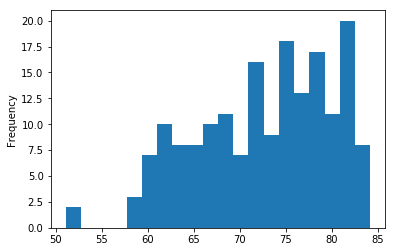

In [5]:
world['life_expectancy'].plot(kind='hist', bins=20);

**c)** Create a new column `'area'` which contains the area of each country in km$^2$, estimated by dividing the `'population'` column by the `'pop_density'` column. What are the largest and smallest areas?

In [6]:
world['area'] = world['population'] / world['pop_density']
world['area'].describe()

count    1.780000e+02
mean     7.266146e+05
std      1.910470e+06
min      3.000000e+02
25%      3.306610e+04
50%      1.656482e+05
75%      5.766686e+05
max      1.638225e+07
Name: area, dtype: float64

The largest and smallest areas are 300 km$^2$ and approximately 16.4 million km$^2$, respectively.

**d)** Create a new DataFrame `country_sizes` which contains only the `'country'`, `'population'`, `'pop_density'`, and `'area'` columns.

In [7]:
columns = ['country', 'population', 'pop_density', 'area']
country_sizes = world[columns]
country_sizes.head()

,country,population,pop_density,area
0,Afghanistan,36400000,55.7,6.535009e+05
1,Albania,2930000,107.0,2.738318e+04
2,Algeria,42000000,17.6,2.386364e+06
3,Angola,30800000,24.7,1.246964e+06
4,Antigua and Barbuda,103000,234.0,4.401709e+02


**e)** Save the `country_sizes` data to a new CSV file.

In [8]:
country_sizes.to_csv('data/country_sizes.csv', index=False)

### Bonus exercises

**f) Working with text data - counting unique values** 

For text data with many repeated values, such as the `'region'`, `'sub_region'`, and `'income_group'` categories, it can be useful to know what the unique values are and how often each unique value occurs. There several handy methods for this.
- On the `'region'` column of `world`, call each of the following methods to see what the output looks like: `unique`, `nunique`, and `value_counts`. What do each of these methods do?
- Which region has the fewest countries?

In [9]:
world['region'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [10]:
world['region'].nunique()

5

In [11]:
world['region'].value_counts()

Africa      52
Asia        47
Europe      39
Americas    31
Oceania      9
Name: region, dtype: int64

- The `unique` method returns an array of the unique values in the Series.
- The `nunique` method returns the number of unique values in the Series.
- The `value_counts` method returns the unique values in the Series and the counts for each one.
- The Oceania region has the fewest countries (9).

**g) Working with text data - string methods**

`pandas` Series have a few *accessors*, which are attributes that [act like an interface to additional methods](https://realpython.com/python-pandas-tricks/#3-take-advantage-of-accessor-methods). With a Series of text data, the `str` accessor allows you to apply string methods such as `upper`, `lower`, `strip`, `replace`, etc. to all the items in the Series.

- Create a variable `sub_regions` which contains the `'sub_region'` column of `world`.
- Check out some of the documentation with `sub_regions.str?` and `sub_regions.str.upper?`. 
- Create a new Series of the sub-region categories converted to upper case.
- Create a new Series of the sub-region categories where any instance of `'Northern'` is replaced with `'NORTHERN!'` (e.g., `'Northern Europe'` becomes `'NORTHERN! Europe'`).
- For both of these new Series, use the `value_counts` method to verify that the output is what you were expecting.

In [12]:
sub_regions = world['sub_region']

In [13]:
sub_regions_upper = sub_regions.str.upper()
sub_regions_upper.value_counts()

SUB-SAHARAN AFRICA                 46
LATIN AMERICA AND THE CARIBBEAN    29
WESTERN ASIA                       18
SOUTHERN EUROPE                    12
SOUTH-EASTERN ASIA                 10
EASTERN EUROPE                     10
NORTHERN EUROPE                    10
SOUTHERN ASIA                       9
WESTERN EUROPE                      7
NORTHERN AFRICA                     6
EASTERN ASIA                        5
CENTRAL ASIA                        5
MELANESIA                           4
POLYNESIA                           2
AUSTRALIA AND NEW ZEALAND           2
NORTHERN AMERICA                    2
MICRONESIA                          1
Name: sub_region, dtype: int64

In [14]:
sub_regions_2 = sub_regions.str.replace('Northern', 'NORTHERN!')
sub_regions_2.value_counts()

Sub-Saharan Africa                 46
Latin America and the Caribbean    29
Western Asia                       18
Southern Europe                    12
Eastern Europe                     10
NORTHERN! Europe                   10
South-eastern Asia                 10
Southern Asia                       9
Western Europe                      7
NORTHERN! Africa                    6
Eastern Asia                        5
Central Asia                        5
Melanesia                           4
Australia and New Zealand           2
NORTHERN! America                   2
Polynesia                           2
Micronesia                          1
Name: sub_region, dtype: int64

**h) Data wrangling - concatenating DataFrames**

Now we'll return to the Environment Canada weather data, and see how to do some of the data wrangling.
- In the `data/raw` sub-folder, there are CSV files with daily weather data for the years 1938-1942, in the original format downloaded from Environment Canada.
- Using your code from previous bonus exercise 2(e) as a starting point, read the data from 1938 into a DataFrame `df_1938`, skipping the extra header rows.
- Repeat the previous step to read the 1939 data into a DataFrame `df_1939`.
- Use `shape`, `head`, and `tail` to confirm that each DataFrame is the expected size and contains the expected dates.

In [15]:
df_1938 = pandas.read_csv('data/raw/weather_YVR_1938.csv', skiprows=24)
df_1938.shape

(365, 27)

In [16]:
df_1938.head(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1938-01-01,1938,1,1,NaN,9.4,NaN,-0.6,NaN,4.4,...,NaN,M,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1938-01-02,1938,1,2,NaN,7.2,NaN,1.7,NaN,4.5,...,NaN,M,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_1938.tail(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
363,1938-12-30,1938,12,30,NaN,6.7,NaN,5.0,NaN,5.9,...,0.0,NaN,29.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,1938-12-31,1938,12,31,NaN,9.4,NaN,3.9,NaN,6.7,...,0.0,NaN,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_1939 = pandas.read_csv('data/raw/weather_YVR_1939.csv', skiprows=24)
df_1939.shape

(365, 27)

In [19]:
df_1939.head(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1939-01-01,1939,1,1,NaN,10.0,NaN,6.1,NaN,8.1,...,0.0,NaN,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1939-01-02,1939,1,2,NaN,9.4,NaN,6.1,NaN,7.8,...,0.0,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_1939.tail(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
363,1939-12-30,1939,12,30,NaN,8.9,NaN,-0.6,NaN,4.2,...,0.0,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,1939-12-31,1939,12,31,NaN,10.0,NaN,1.1,NaN,5.6,...,0.0,NaN,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will concatenate the two DataFrames using the `append` method, similar to the `append` method for lists that we saw in Lesson 1.
- Copy the code below into *a single cell* in your notebook and run it, then use `shape`, `head`, and `tail` to confirm that `df_merged` is the expected size and contains the expected dates.

```python
# Create an empty DataFrame
df_merged = pd.DataFrame()

# Append each year of data
df_merged = df_merged.append(df_1938, ignore_index=True)
df_merged = df_merged.append(df_1939, ignore_index=True)
```

> - For the simple example above, we don't actually need to start with an empty DataFrame, but will need it in the next steps.
> - The ignore_index keyword argument tells `pandas` to create a new index of row numbers for the new DataFrame, rather than preserving the row numbers from each individual DataFrame (which would get confusing).

In [21]:
# Create an empty DataFrame
df_merged = pandas.DataFrame()

# Append each year of data
df_merged = df_merged.append(df_1938, ignore_index=True)
df_merged = df_merged.append(df_1939, ignore_index=True)

In [22]:
df_merged.shape

(730, 27)

In [23]:
df_merged.head(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1938-01-01,1938,1,1,NaN,9.4,NaN,-0.6,NaN,4.4,...,NaN,M,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1938-01-02,1938,1,2,NaN,7.2,NaN,1.7,NaN,4.5,...,NaN,M,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_merged.tail(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
728,1939-12-30,1939,12,30,NaN,8.9,NaN,-0.6,NaN,4.2,...,0.0,NaN,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,1939-12-31,1939,12,31,NaN,10.0,NaN,1.1,NaN,5.6,...,0.0,NaN,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To concatenate a larger number of DataFrames, we'll want to use a loop. Using your code from previous bonus exercise 1.3(d) as a starting point:
- Create an empty DataFrame `data_merged`.
- Create a `for` loop which loops over the sequence of years from 1938 to 1942.
- Inside the loop, read the CSV file for that year into a DataFrame `data_in`. (You may want to break this down into two steps, where you first define the appropriate file name for that year, and then read the data from that file.)
- Append `data_in` to `data_merged`.

Once you've run the `for` loop, use `shape`, `head`, and `tail` to check that the data in `data_merged` makes sense. You might also want to use the `unique` and `value_counts` methods on the `'Year'` column to verify that the DataFrame contains all the expected years.

In [25]:
data_merged = pandas.DataFrame()

for year in range(1938, 1943):
    data_file = 'data/raw/weather_YVR_' + str(year) + '.csv'
    data_in = pandas.read_csv(data_file, skiprows=24)
    data_merged = data_merged.append(data_in, ignore_index=True)

In [26]:
data_merged.shape

(1826, 27)

In [27]:
data_merged.head(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1938-01-01,1938,1,1,NaN,9.4,NaN,-0.6,NaN,4.4,...,NaN,M,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1938-01-02,1938,1,2,NaN,7.2,NaN,1.7,NaN,4.5,...,NaN,M,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data_merged.tail(2)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
1824,1942-12-30,1942,12,30,NaN,7.2,NaN,1.1,NaN,4.2,...,0.0,NaN,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825,1942-12-31,1942,12,31,NaN,7.8,NaN,1.1,NaN,4.5,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_merged['Year'].value_counts()

1940    366
1942    365
1941    365
1939    365
1938    365
Name: Year, dtype: int64

---

Go to: [solutions-1](solutions-1.ipynb) | [solutions-2](solutions-2.ipynb) | solutions-3 | [solutions-4](solutions-4.ipynb) | [solutions-5](solutions-5.ipynb) | [solutions-6](solutions-6.ipynb)

[home](../0-introduction.ipynb)